In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

import hist
import coffea
import uproot

ModuleNotFoundError: No module named 'matplotlib'

In [2]:
f = uproot.open("output2/trip4_slimmed_ntuple_QCD_HT1500to2000_TuneCP5_13TeV-madgraph-pythia8_v2_118.root")
f.classnames()


{'events;1': 'TTree'}

In [9]:
events = f['events']

In [4]:
br = events.arrays()


Text(0.5, 0, 'Inv Mass [GeV]')

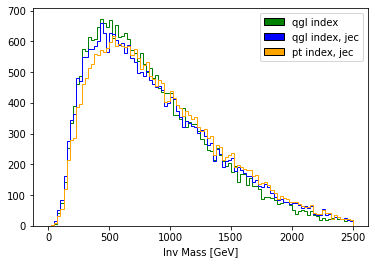

In [5]:
from awkward import flatten 
from matplotlib.patches import Rectangle

cmap = plt.get_cmap('jet')
low = cmap(0.5)
medium =cmap(0.25)
high = cmap(0.8)

handles = [Rectangle((0,0),0.8,0.8,color=c,ec="k") for c in ['green','blue', 'orange']]
labels= ["qgl index","qgl index, jec", "pt index, jec"]
plt.legend(handles, labels)

plt.hist(flatten(br['trip_mass']), bins= 100, histtype='step', color='green',range=(0,2500))
plt.hist(flatten(br['jtrip_mass']), bins= 100, histtype='step', color='blue',range=(0,2500))
plt.hist(flatten(br['ptrip_mass']), bins= 100, histtype='step', color='orange',range=(0,2500))
plt.xlabel("Inv Mass [GeV]")

Text(0.5, 0, 'Inv Mass [GeV]')

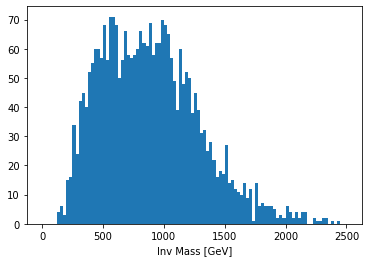

In [6]:
good_inv_masses = []

for event in br['jtrip_mass']:
    pair = [event[0],event[1]]
    asym = abs(event[0] - event[1])/(event[0] + event[1])
    for i in range (1, 5):
        if (abs((event[2*i] - event[2*i+1])/(event[2*i] + event[2*i+1])) < asym ):
            pair = [event[2*i],event[2*i+1]]
            asym = abs((event[2*i] - event[2*i+1])/(event[2*i] + event[2*i+1]))
            
    good_inv_masses.append(pair)
plt.hist(flatten(good_inv_masses), bins= 100, range=(0,2500))
plt.xlabel("Inv Mass [GeV]")

Text(0.5, 0, 'Inv Mass [GeV]')

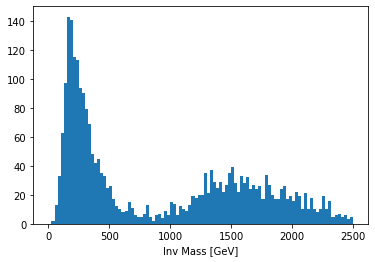

In [8]:
bad_inv_masses = []

for event in br['jtrip_mass']:
    pair = [event[0],event[1]]
    asym = abs(event[0] - event[1])/(event[0] + event[1])
    for i in range (1, 5):
        if (abs((event[2*i] - event[2*i+1])/(event[2*i] + event[2*i+1])) > asym ):
            pair = [event[2*i],event[2*i+1]]
            asym = abs((event[2*i] - event[2*i+1])/(event[2*i] + event[2*i+1]))
    bad_inv_masses.append(pair)
plt.hist(flatten(bad_inv_masses), bins= 100, range=(0,2500))
plt.xlabel("Inv Mass [GeV]")

(array([0., 0., 0., 0., 0., 3., 0., 0., 0., 0.]),
 array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5]),
 <BarContainer object of 10 artists>)

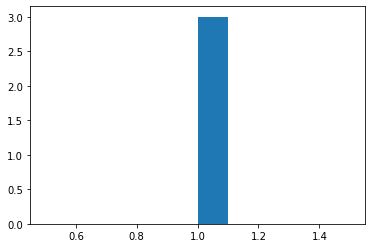

In [10]:
plt.hist([1,1,1])